In [1]:
from functions import *

/glade/u/apps/opt/conda/envs/npl-2024b/lib/python3.11/site-packages/xarray/conventions.py:286: SerializationWarning: variable 'psl' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


In [2]:
sw = xr.open_dataset(lnd_dir_20 + 'test_LGM_oldtopo.clm2.h0.FSA.000101-002012.nc')["FSA"]
lw = xr.open_dataset(lnd_dir_20 + 'test_LGM_oldtopo.clm2.h0.FIRA.000101-002012.nc')["FIRA"]
sh = xr.open_dataset(lnd_dir_20 + 'test_LGM_oldtopo.clm2.h0.FSH.000101-002012.nc')["FSH"]
lh = xr.open_dataset(lnd_dir_20 + 'test_LGM_oldtopo.clm2.h0.QSOIL.000101-002012.nc')["QSOIL"]/(2835*1000*1000*(1/1000)) # m/s / lhro
fgr = xr.open_dataset(lnd_dir_20 + 'test_LGM_oldtopo.clm2.h0.FGR.000101-002012.nc')["FGR"]
fsm = xr.open_dataset(lnd_dir_20 + 'test_LGM_oldtopo.clm2.h0.FSM.000101-002012.nc')["FSM"]
snow = xr.open_dataset(lnd_dir_20 + 'test_LGM_oldtopo.clm2.h0.SNOW.000101-002012.nc')["SNOW"]/1000 #m/s
qice = xr.open_dataset(lnd_dir_20 + 'test_LGM_oldtopo.clm2.h0.QICE.000101-002012.nc')["QICE"]/1000 #m/s
pct_ice = xr.open_dataset(ice_dir + 'surfdata_fv09_hist_16pfts_nourb_CMIP6_21ka.c200624.nc')["PCT_GLACIER"]


In [3]:
gh = xr.DataArray(fsm - fgr)

In [4]:
ps = xr.DataArray(snow)

In [5]:
melt = (sw - lw - sh - (lh - gh))/(334*1000*1000)
#melt = melt.where(melt >= 0, 0)

In [6]:
smb = ps - melt

In [9]:
july_melt = melt.sel(time=sw.time.dt.month == 7)
july_ps = ps.sel(time=sw.time.dt.month == 7)
july_smb = smb.sel(time=sw.time.dt.month == 7)
july_qice = qice.sel(time=sw.time.dt.month == 7)

jan_melt = melt.sel(time=sw.time.dt.month == 1)
jan_ps = ps.sel(time=sw.time.dt.month == 1)
jan_smb = smb.sel(time=sw.time.dt.month == 1)
jan_qice = qice.sel(time=sw.time.dt.month == 1)

In [10]:
ice_mask = np.tile(xr.where(pct_ice == 100, 1, np.nan), (july_melt.shape[0], 1, 1))

In [11]:
july_melt_l = preprocess_laurentide_no_des(july_melt * ice_mask)
july_ps_l = preprocess_laurentide_no_des(july_ps* ice_mask)
july_smb_l = preprocess_laurentide_no_des(july_smb* ice_mask)
july_qice_l = preprocess_laurentide_no_des(july_qice* ice_mask)

jan_melt_l = preprocess_laurentide_no_des(jan_melt * ice_mask)
jan_ps_l = preprocess_laurentide_no_des(jan_ps* ice_mask)
jan_smb_l = preprocess_laurentide_no_des(jan_smb* ice_mask)
jan_qice_l = preprocess_laurentide_no_des(jan_qice* ice_mask)

slicing data
slicing data
slicing data
slicing data
slicing data
slicing data
slicing data
slicing data


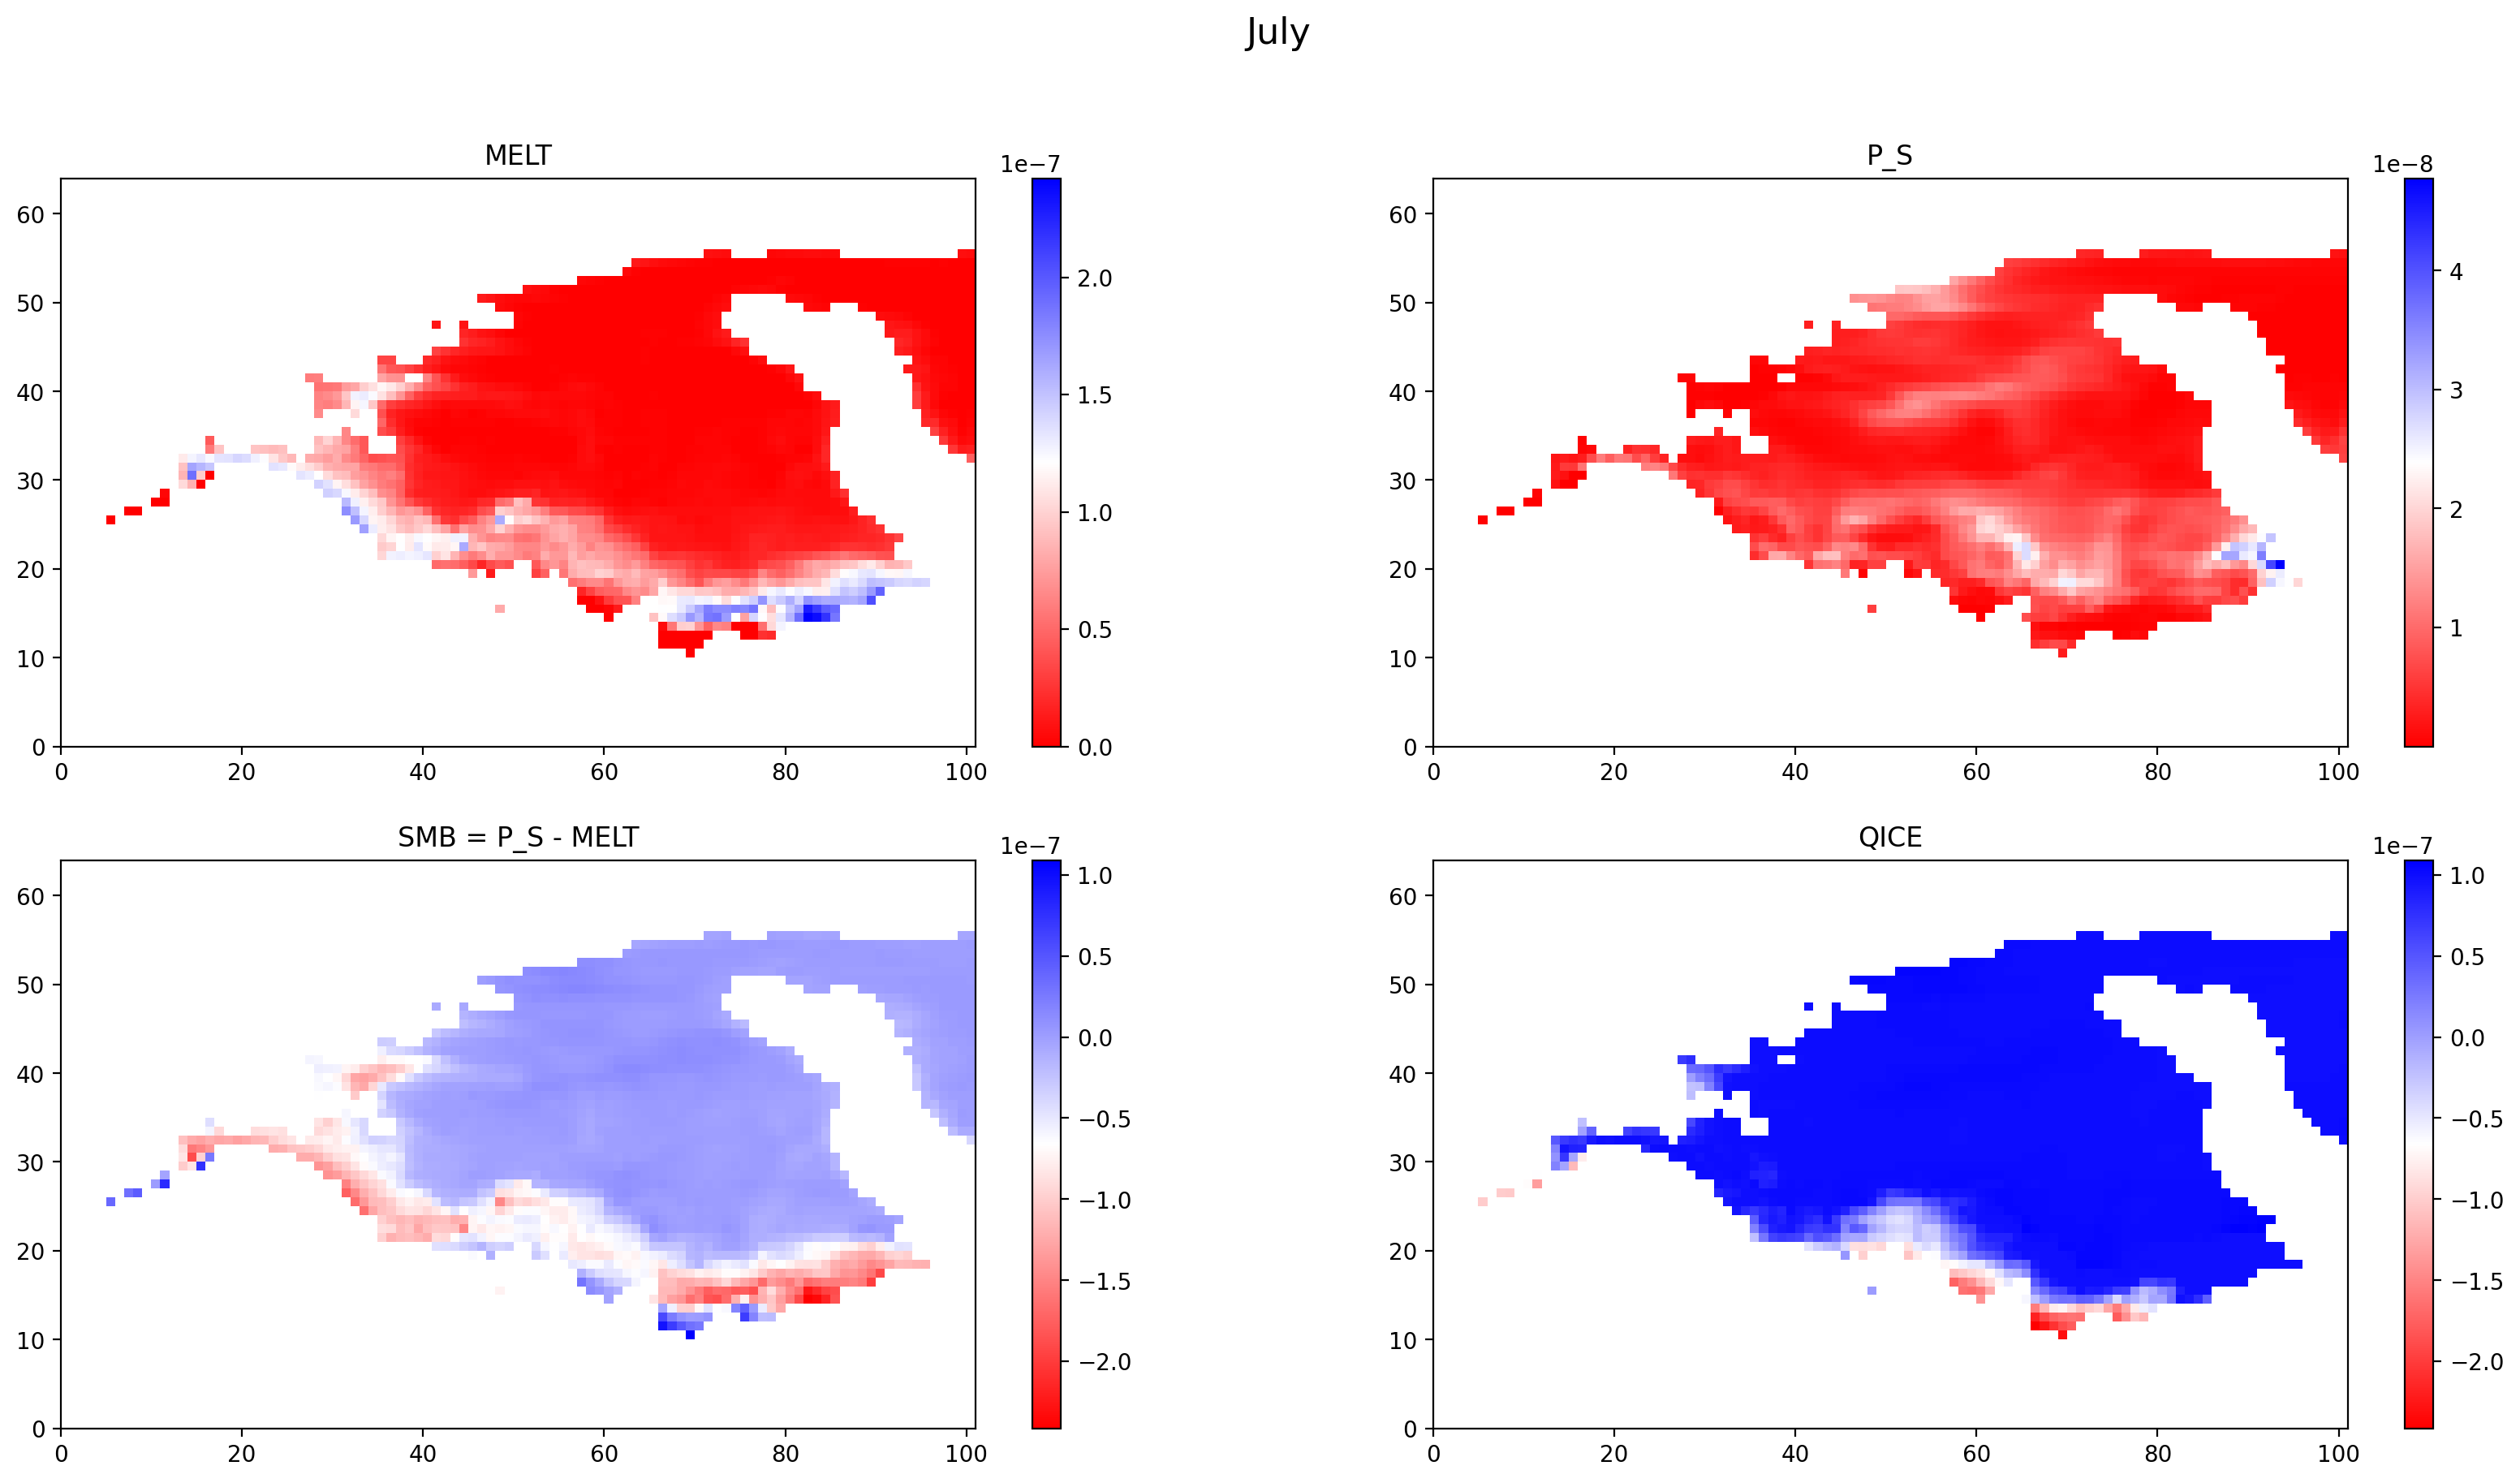

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(20,10), dpi=200)
ax = axs.flatten()

cmesh = ax[0].pcolormesh(july_melt_l[0],vmin = 0, cmap='bwr_r')
ax[0].set_title('MELT')
fig.colorbar(cmesh, ax=ax[0]) 

cmesh1 = ax[1].pcolormesh(july_ps_l[0],cmap='bwr_r')
ax[1].set_title('P_S')
fig.colorbar(cmesh1, ax=ax[1]) 

cmesh2 = ax[2].pcolormesh(july_smb_l[0],cmap='bwr_r')
ax[2].set_title('SMB = P_S - MELT')
fig.colorbar(cmesh2, ax=ax[2]) 

cmesh3 = ax[3].pcolormesh(july_qice_l[0],cmap='bwr_r')
ax[3].set_title('QICE')
fig.colorbar(cmesh2, ax=ax[3]) 
fig.suptitle('July', fontsize=16)
plt.show()

 

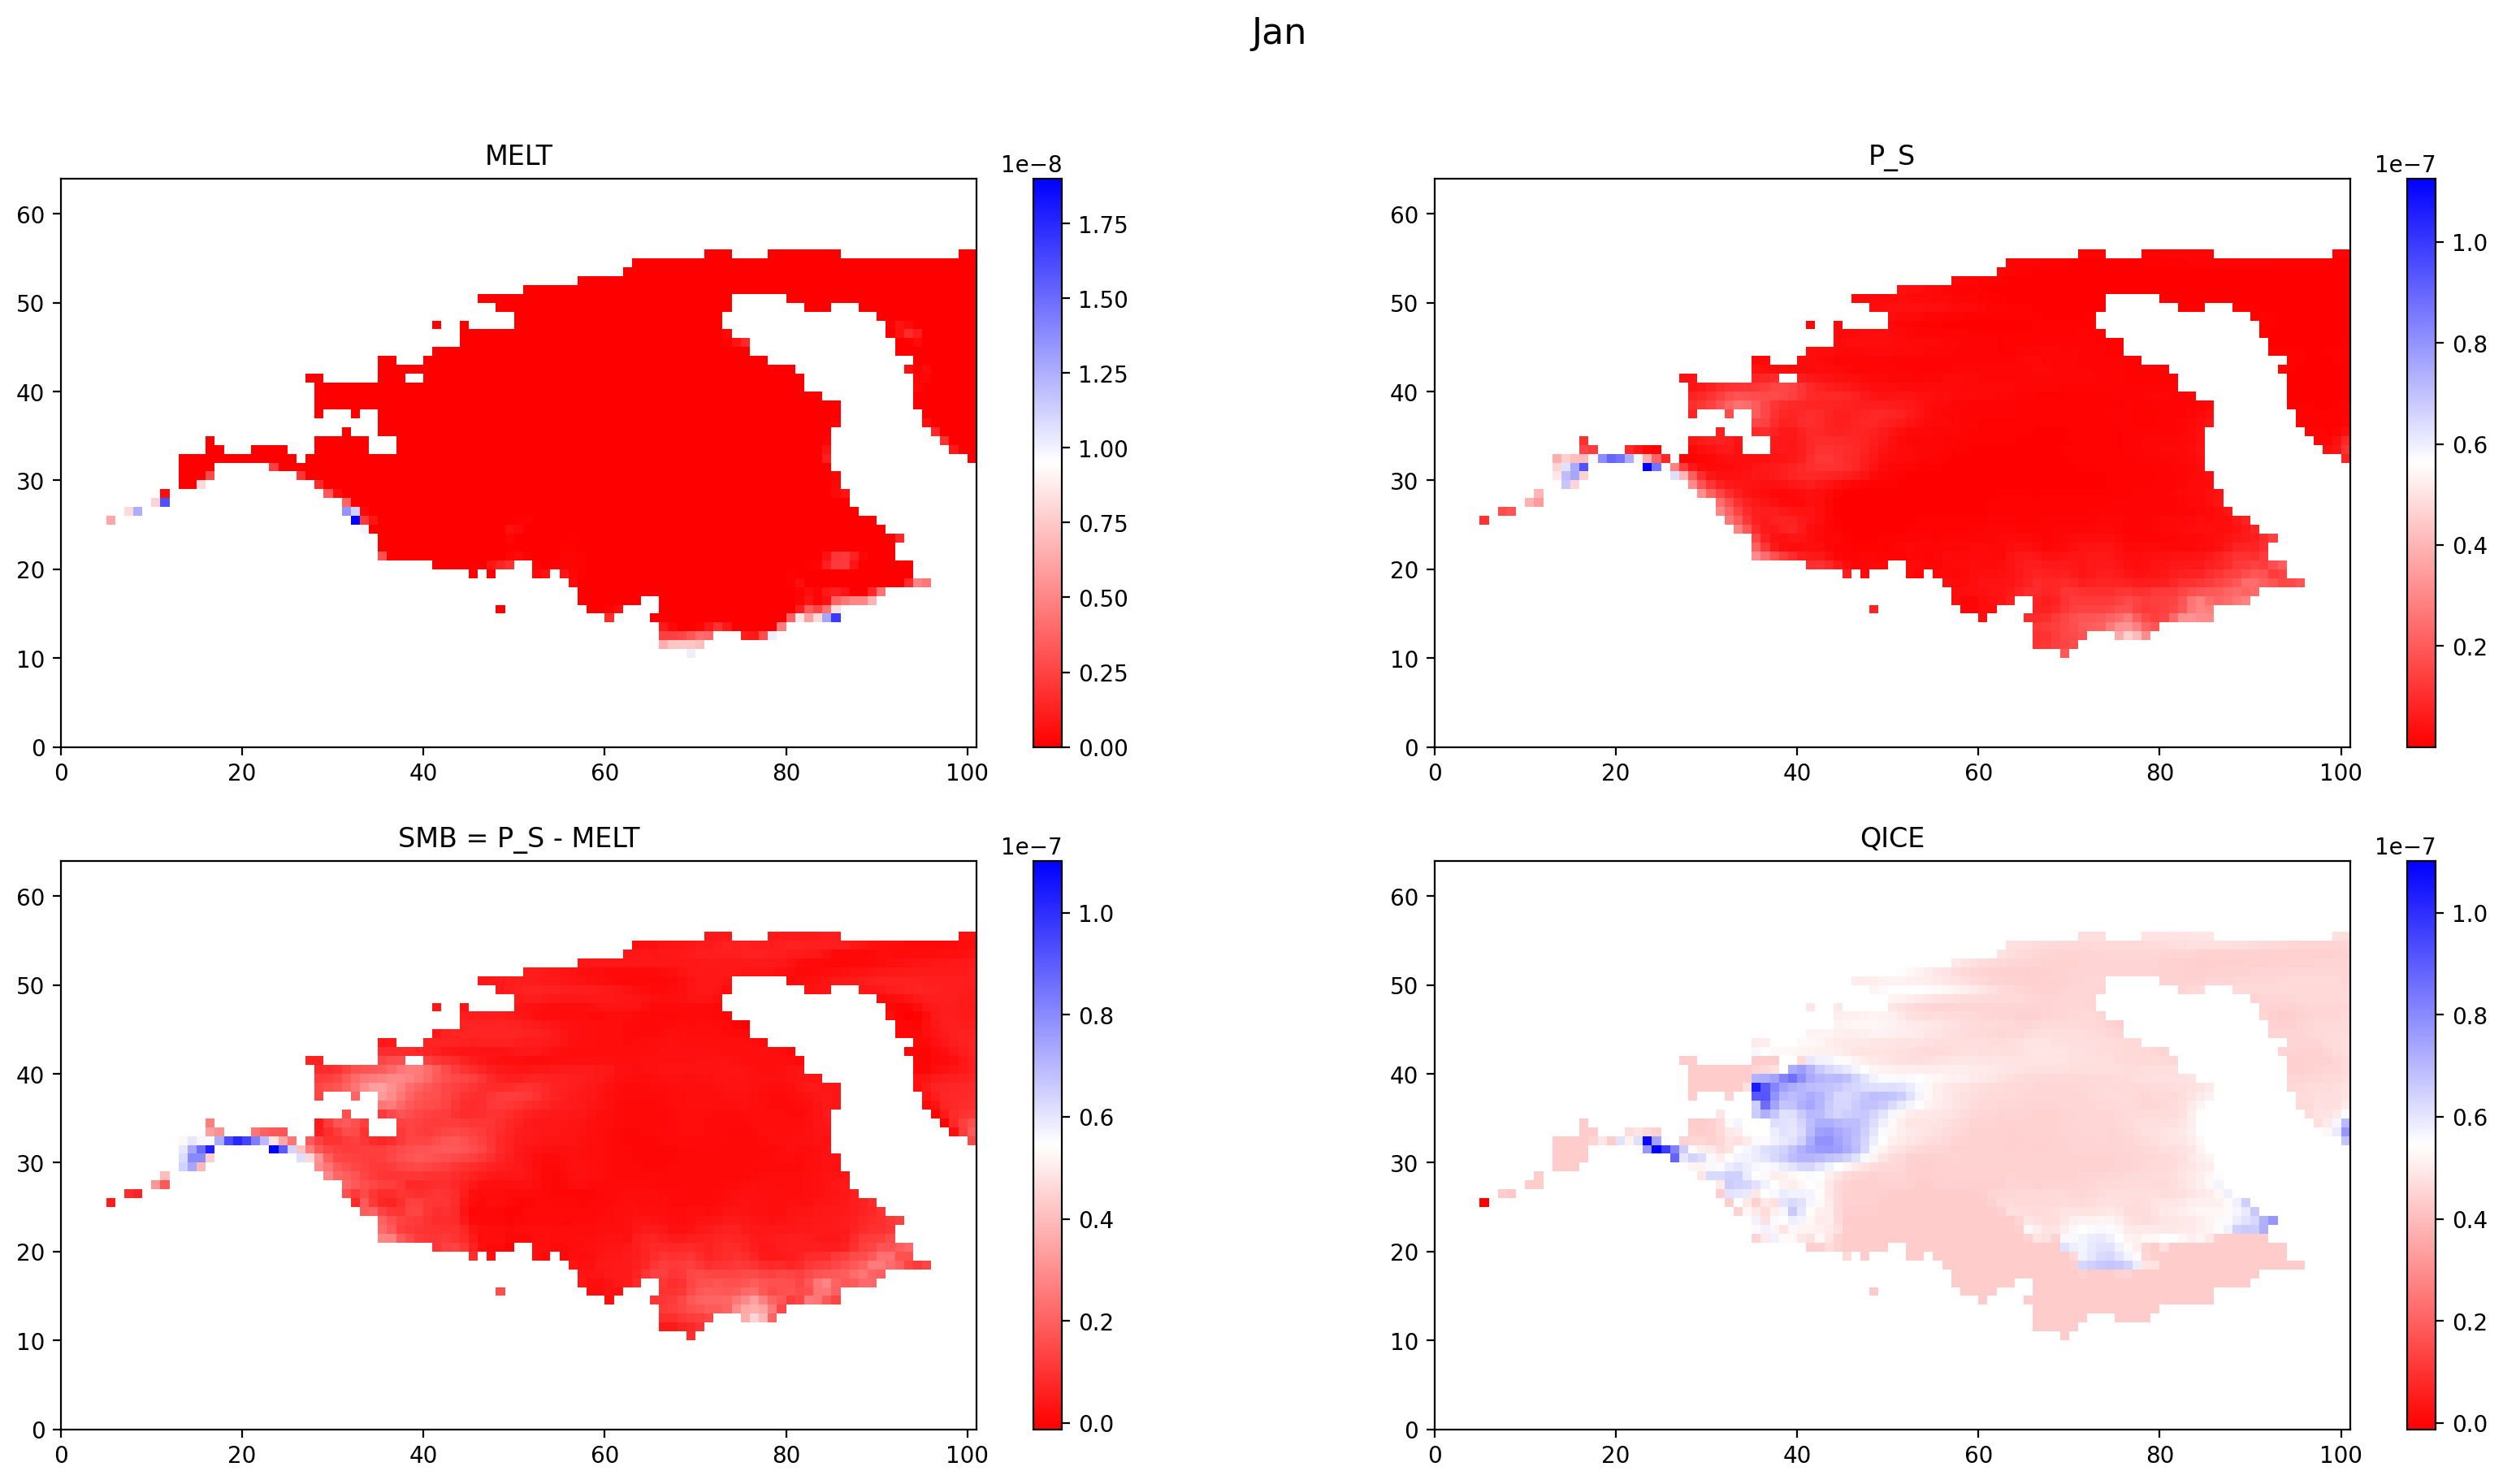

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(20,10), dpi=200)
ax = axs.flatten()

cmesh = ax[0].pcolormesh(jan_melt_l[0],vmin = 0, cmap='bwr_r')
ax[0].set_title('MELT')
fig.colorbar(cmesh, ax=ax[0]) 

cmesh1 = ax[1].pcolormesh(jan_ps_l[0],cmap='bwr_r')
ax[1].set_title('P_S')
fig.colorbar(cmesh1, ax=ax[1]) 

cmesh2 = ax[2].pcolormesh(jan_smb_l[0],cmap='bwr_r')
ax[2].set_title('SMB = P_S - MELT')
fig.colorbar(cmesh2, ax=ax[2]) 

cmesh3 = ax[3].pcolormesh(jan_qice_l[0],cmap='bwr_r')
ax[3].set_title('QICE')
fig.colorbar(cmesh2, ax=ax[3]) 
fig.suptitle('Jan', fontsize=16)
plt.show()

In [14]:
smb_100_ice = preprocess_laurentide_only_dec(smb*create_ice_mask(smb))


converting data to m/s
deseasonalizing data
slicing data


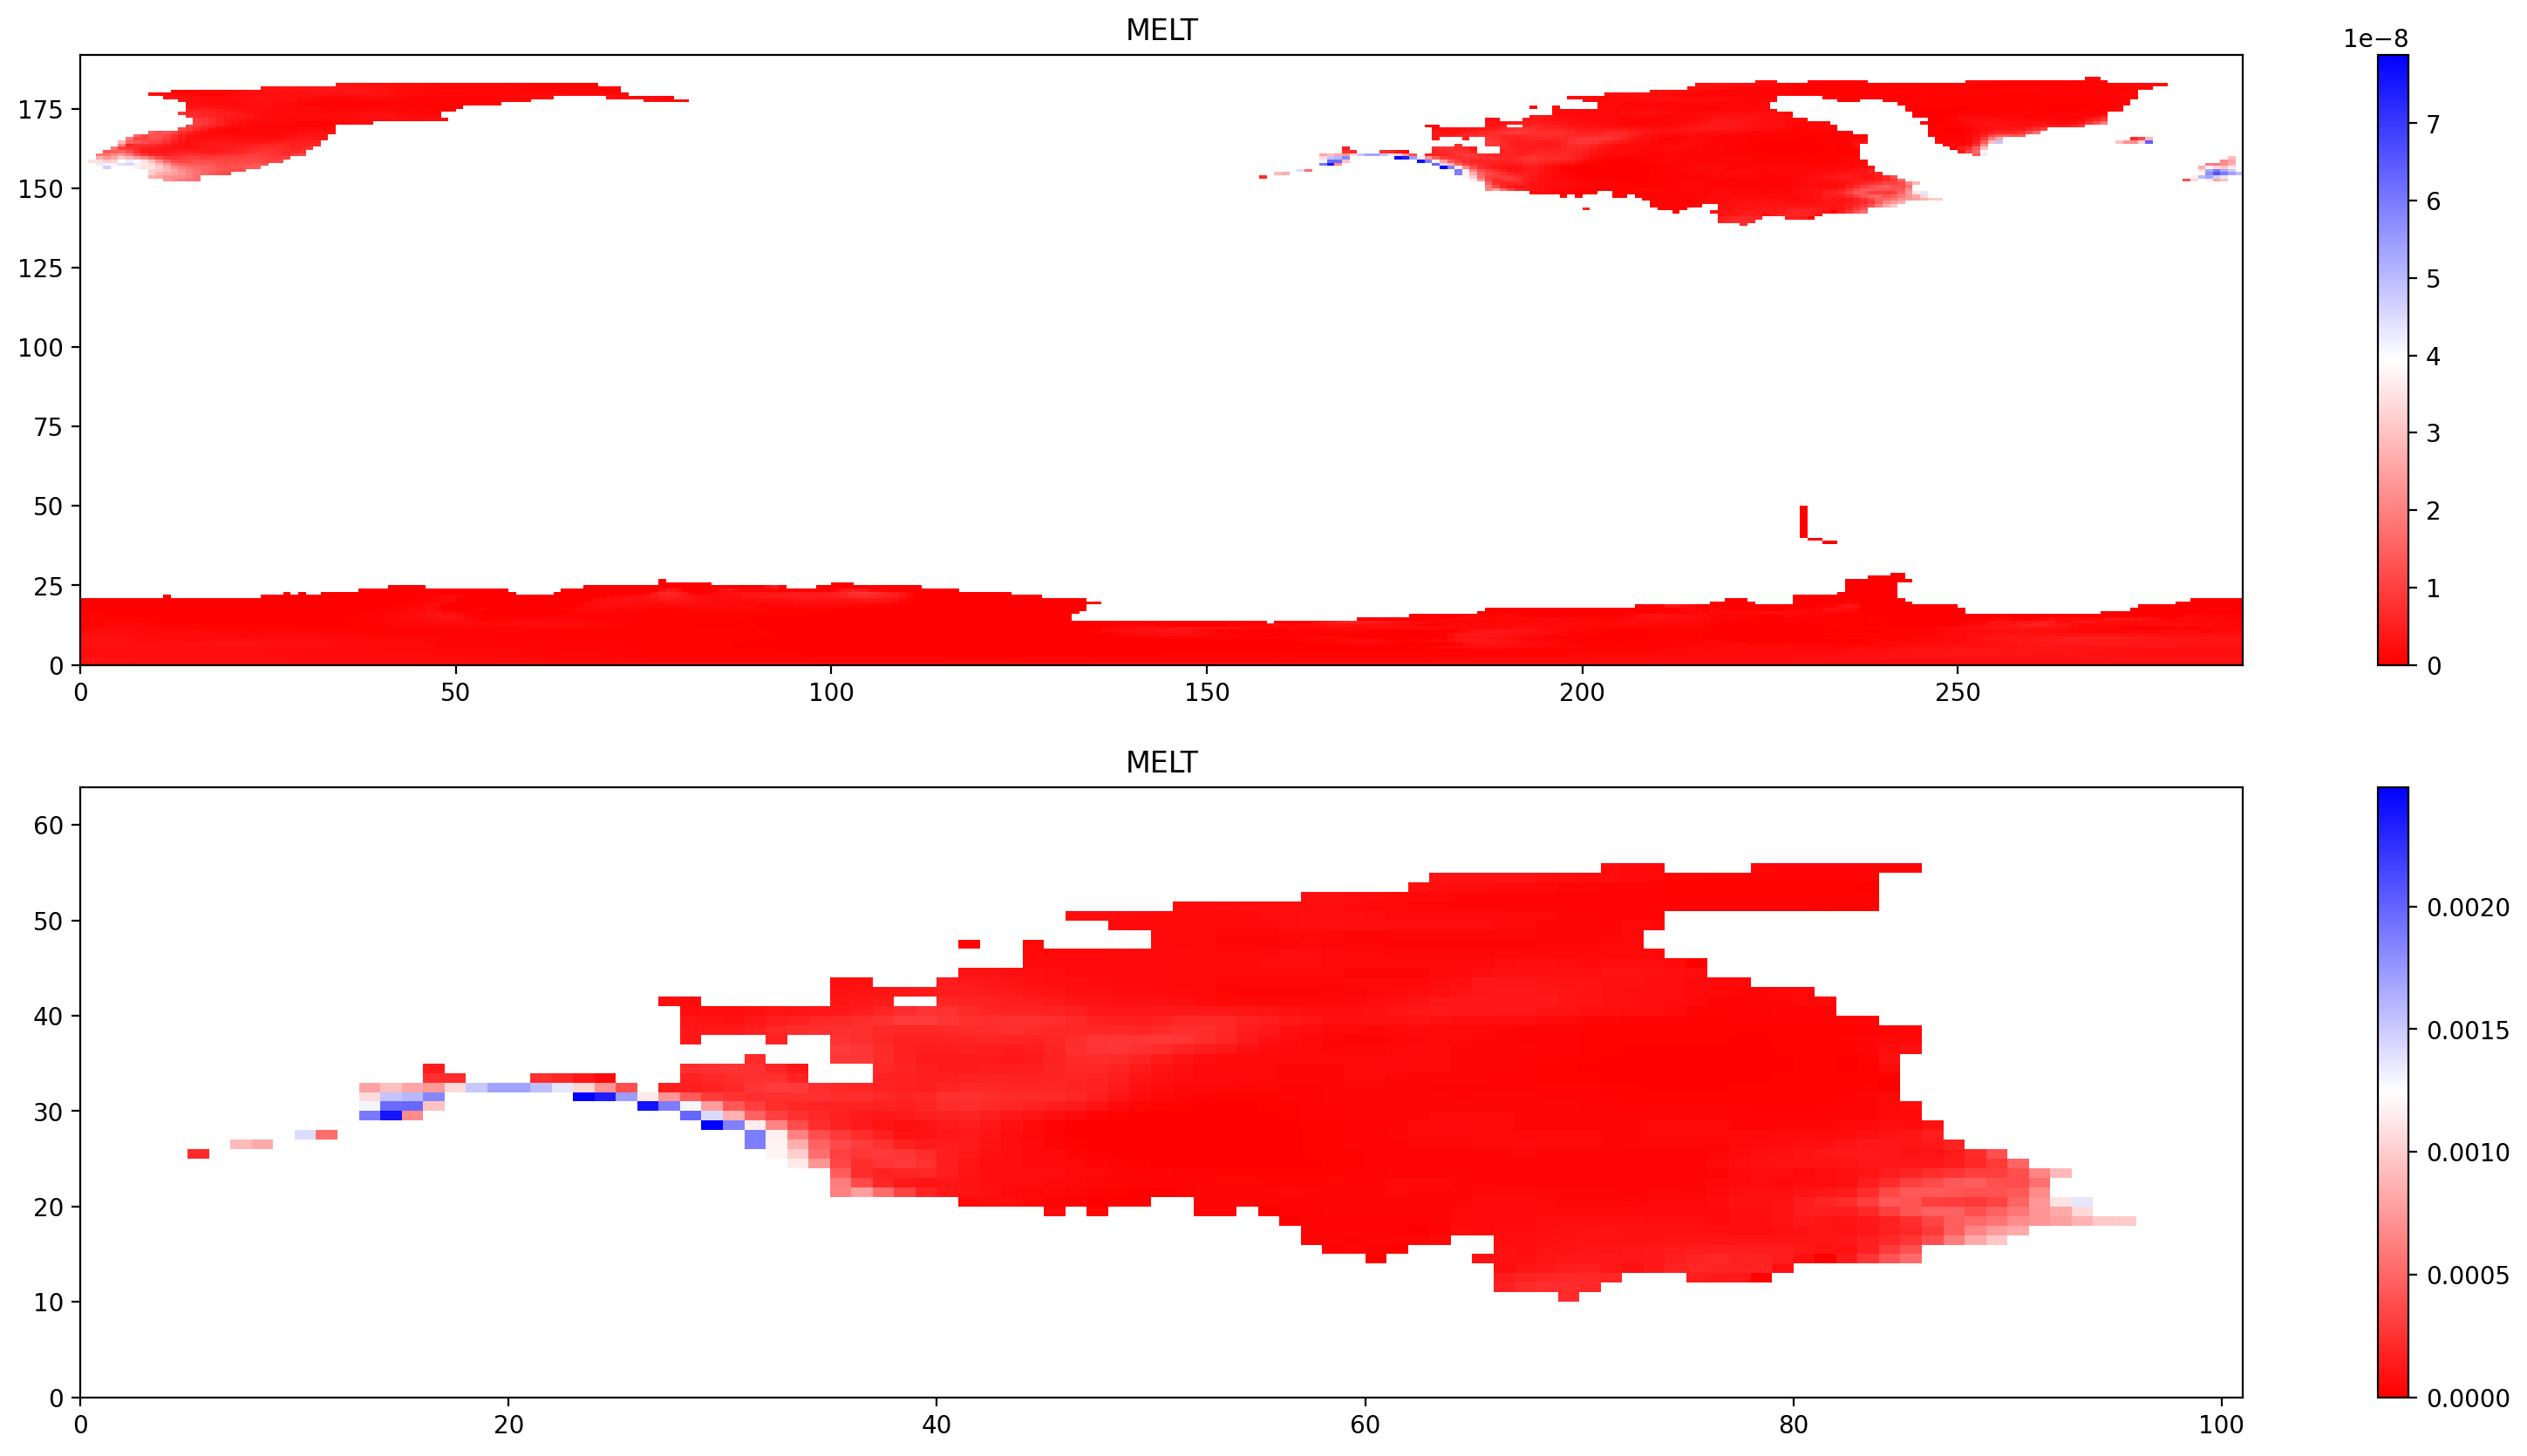

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(20,10), dpi=200)
ax = axs.flatten()

cmesh = ax[0].pcolormesh((smb*create_ice_mask(smb))[0],vmin = 0, cmap='bwr_r')
ax[0].set_title('MELT')
fig.colorbar(cmesh, ax=ax[0]) 

cmesh = ax[1].pcolormesh(smb_100_ice[0],vmin = 0, cmap='bwr_r')
ax[1].set_title('MELT')
fig.colorbar(cmesh, ax=ax[1]) 

______________
PROCESSING DATA
converting data to m/s
deseasonalizing data
slicing data
______________
CONVERTING TO 2D
time 240 lat 64 long 101
finished finding nans
total nans 4578
up through 0
up through 50
up through 100
up through 150
up through 200
X shape (1886, 240)
______________
DOING PCA
covariance matrix shape (1886, 1886)
we calculated the first  10  evals
______________
PLOTTING EVALS


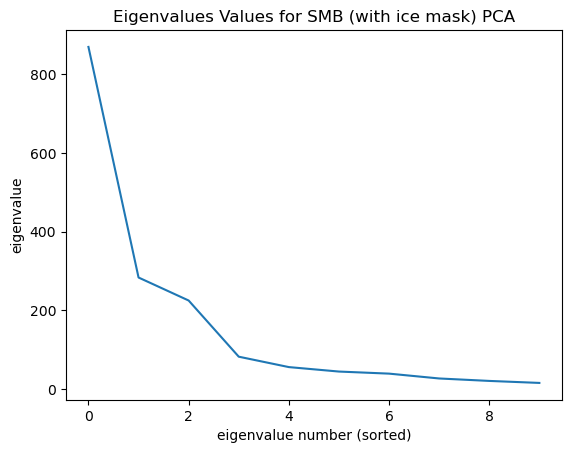

1 variance explained: 52.26%
2 variance explained: 17.04%
3 variance explained: 13.53%
4 variance explained: 4.95%
______________
PLOTTING TIME


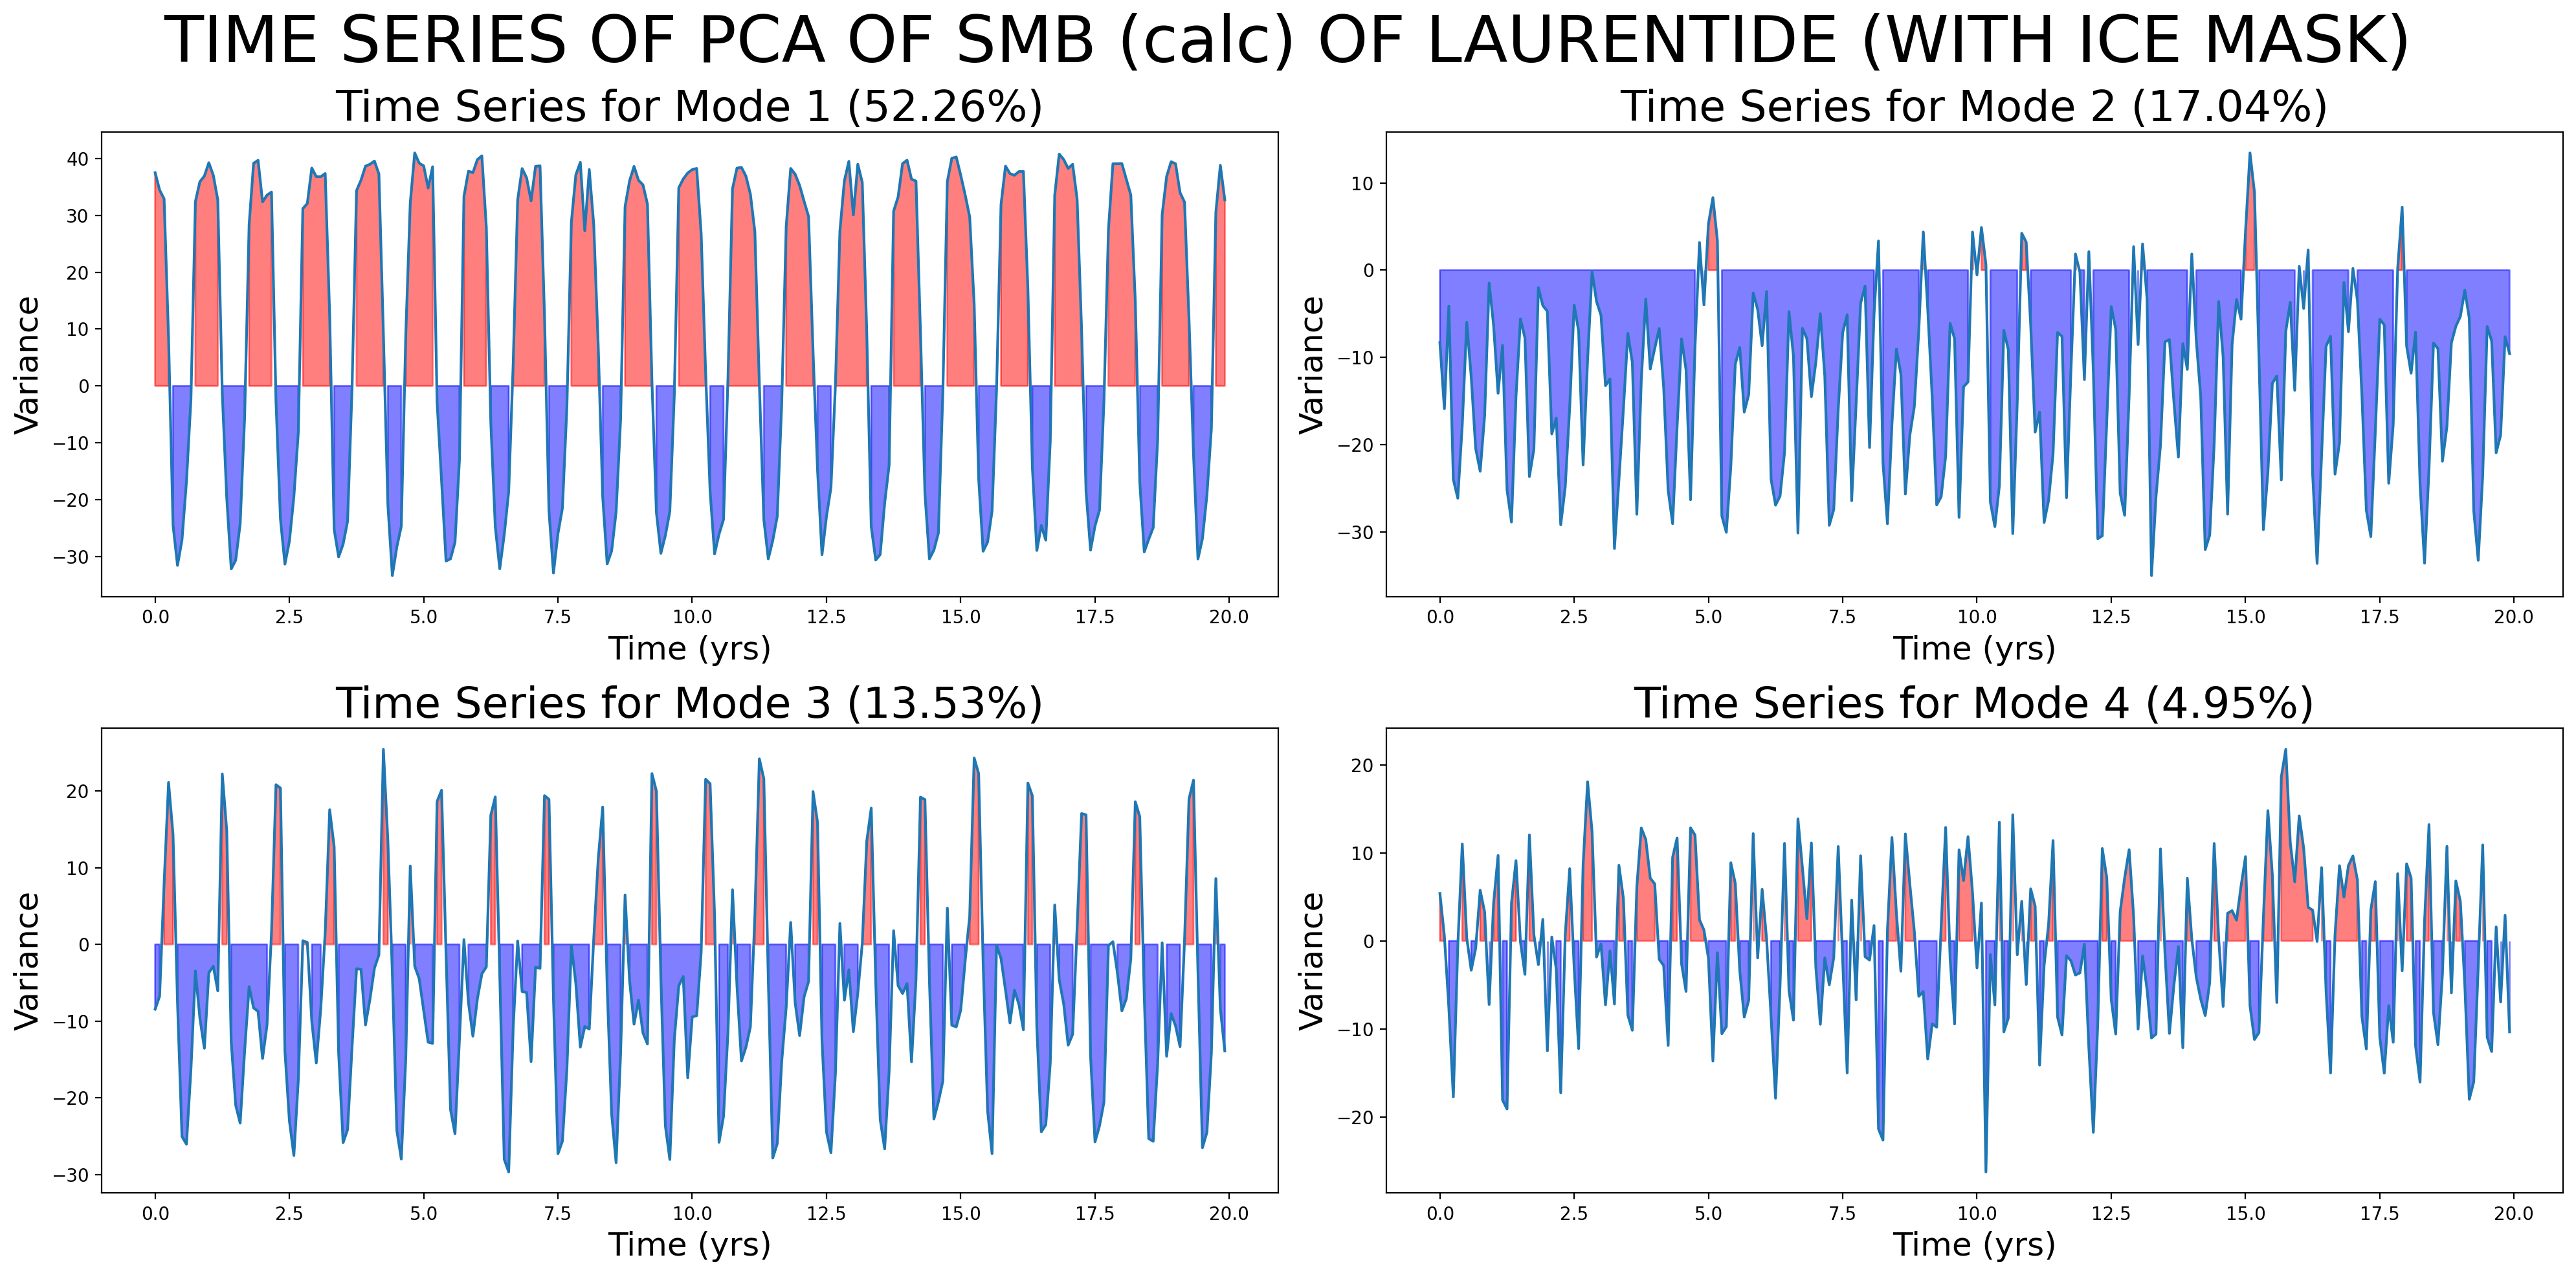

______________
PLOTTING PCs


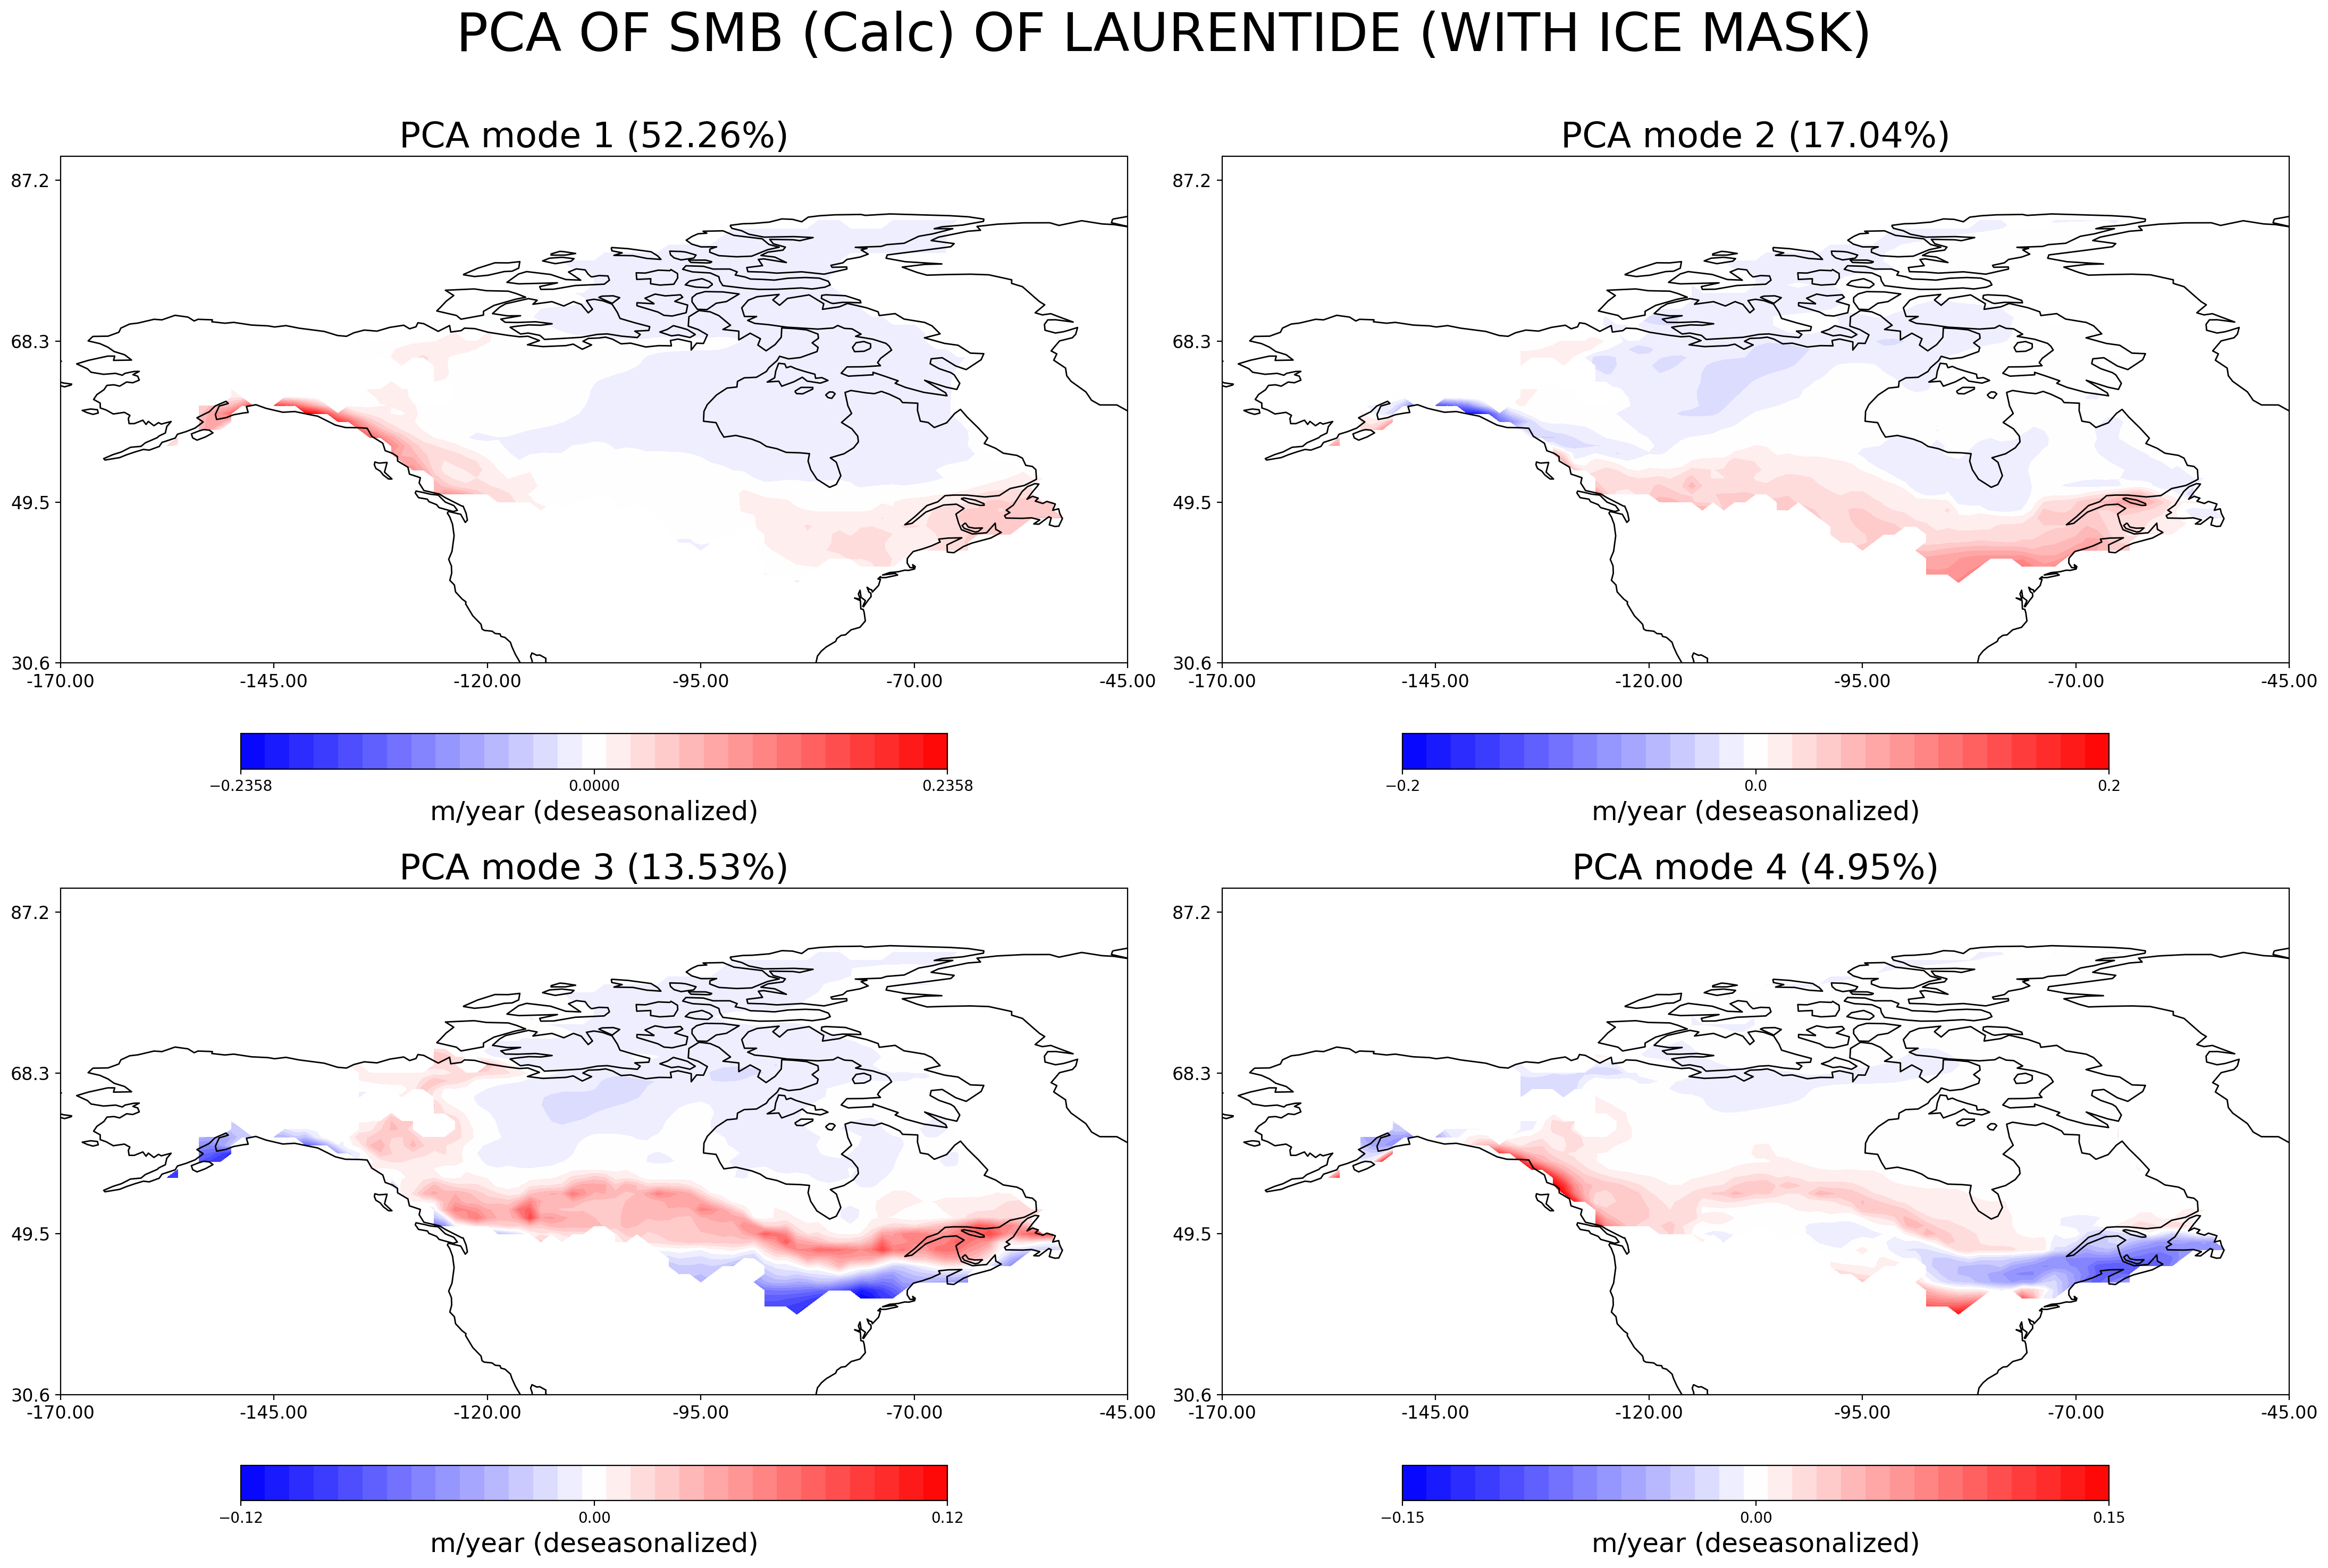

In [16]:
print("______________")
print("PROCESSING DATA")
smb_100_ice = preprocess_laurentide_only_dec(smb*create_ice_mask(smb))
print("______________")
print("CONVERTING TO 2D")
smb100_X_dimensional, smb100_im, smb100_jm, smb100_long_length, smb100_lat_length = nans_3d_to_2d(smb_100_ice)
print("______________")
print("DOING PCA")
smb100_eigenvalues, smb100_V, smb100_X = pca(xr.DataArray(smb100_X_dimensional), 10)
print("______________")
print("PLOTTING EVALS")
perc_smb_100 = plot_eigen(smb100_eigenvalues, "SMB (with ice mask)")
print("______________")
print("PLOTTING TIME")
plot_time_series(smb100_V, smb100_X, 4, "TIME SERIES OF PCA OF SMB (calc) OF LAURENTIDE (WITH ICE MASK)", perc_smb_100)
print("______________")
print("PLOTTING PCs")
smb100_PCAs = nans_2d_to_3d(smb100_V, smb100_long_length, smb100_lat_length, smb100_im, smb100_jm)
data_smb_100 ={
    'reshaped_pca': smb100_PCAs,
    'original': smb_100_ice,
    'label': "m/year (deseasonalized)",
    'shift': 360,
    'l_override': {
        1:.2,
        3:.15
    },
    'perc': perc_smb_100
}

plot_pcs(data_smb_100, 4, "PCA OF SMB (Calc) OF LAURENTIDE (WITH ICE MASK)")

In [17]:
psl_all = xr.open_dataset(atm_dir_20 + 'test_LGM_oldtopo.cam.h0.PSL.000101-002012.nc')['PSL']
print("______________")
print("PROCESSING DATA")
north_atlantic_ocean_psl = preprocess_na_ocean(psl_all)
print("______________")
print("CONVERTING TO 2D")
time_length, lat_length, long_length = get_lengths(north_atlantic_ocean_psl)
X_dimensional = north_atlantic_ocean_psl.values.reshape(time_length, lat_length * long_length)

______________
PROCESSING DATA
converting to hecta pascals
deseasonalizing
slicing along lat=(20,80) and long=(-90,40)
______________
CONVERTING TO 2D
time 240 lat 64 long 105


In [19]:
X_dimensional

array([[ -39.929688 ,  -54.203125 ,  -55.8125   , ...,  282.39844  ,
         274.15625  ,  269.85938  ],
       [  -7.375    ,  -21.375    ,  -50.578125 , ..., -275.4375   ,
        -276.6172   , -274.32812  ],
       [ 156.69531  ,  130.35156  ,   86.390625 , ..., 1160.3516   ,
        1172.7891   , 1191.5234   ],
       ...,
       [ -77.21875  ,  -74.67969  ,  -67.91406  , ...,  140.1875   ,
         138.64844  ,  136.22656  ],
       [-208.29688  , -185.46094  , -158.92969  , ..., 1154.0625   ,
        1167.5469   , 1176.8516   ],
       [ -14.6328125,  -18.       ,  -19.695312 , ..., -427.89062  ,
        -410.21094  , -391.65625  ]], dtype=float32)

In [23]:
print("PROCESSING PSL DATA AND CONVERTING TO 2D")
psl_X_dimensional = xr.DataArray(X_dimensional, dims=["data", "month"]).rename({"month": "data", "data": "month"}).T
psl_X_dimensional

PROCESSING PSL DATA AND CONVERTING TO 2D


<xarray.DataArray (data: 6720, month: 240)> Size: 6MB
array([[ -39.929688 ,   -7.375    ,  156.69531  , ...,  -77.21875  ,
        -208.29688  ,  -14.6328125],
       [ -54.203125 ,  -21.375    ,  130.35156  , ...,  -74.67969  ,
        -185.46094  ,  -18.       ],
       [ -55.8125   ,  -50.578125 ,   86.390625 , ...,  -67.91406  ,
        -158.92969  ,  -19.695312 ],
       ...,
       [ 282.39844  , -275.4375   , 1160.3516   , ...,  140.1875   ,
        1154.0625   , -427.89062  ],
       [ 274.15625  , -276.6172   , 1172.7891   , ...,  138.64844  ,
        1167.5469   , -410.21094  ],
       [ 269.85938  , -274.32812  , 1191.5234   , ...,  136.22656  ,
        1176.8516   , -391.65625  ]], dtype=float32)
Dimensions without coordinates: data, month

In [24]:
print("PROCESSING SMB DATA AND CONVERTING TO 2D")
smb_X_dimensional = xr.DataArray(smb100_X_dimensional)
smb_longs = smb100_im
smb_lats = smb100_jm
smb_long_length = smb100_long_length
smb_lat_length = smb100_lat_length
smb_processed = smb_100_ice

PROCESSING SMB DATA AND CONVERTING TO 2D


______________
performing SVD
standardizing
creating covariance matrix
doing svd
______________
displaying covariance percentage


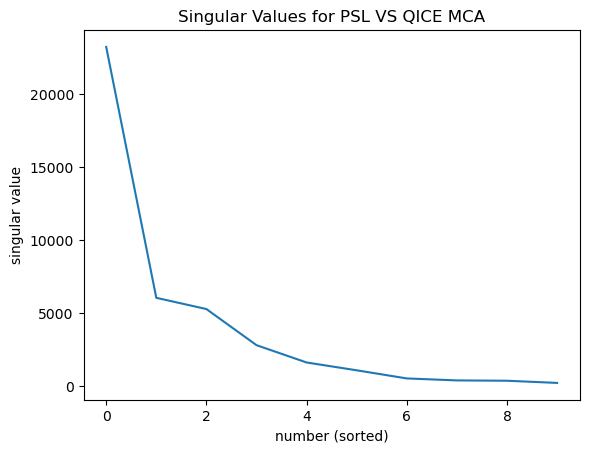

1 covariance explained: 55.61%
2 covariance explained: 14.52%
3 covariance explained: 12.68%
4 covariance explained: 6.77%
______________
graphing time series


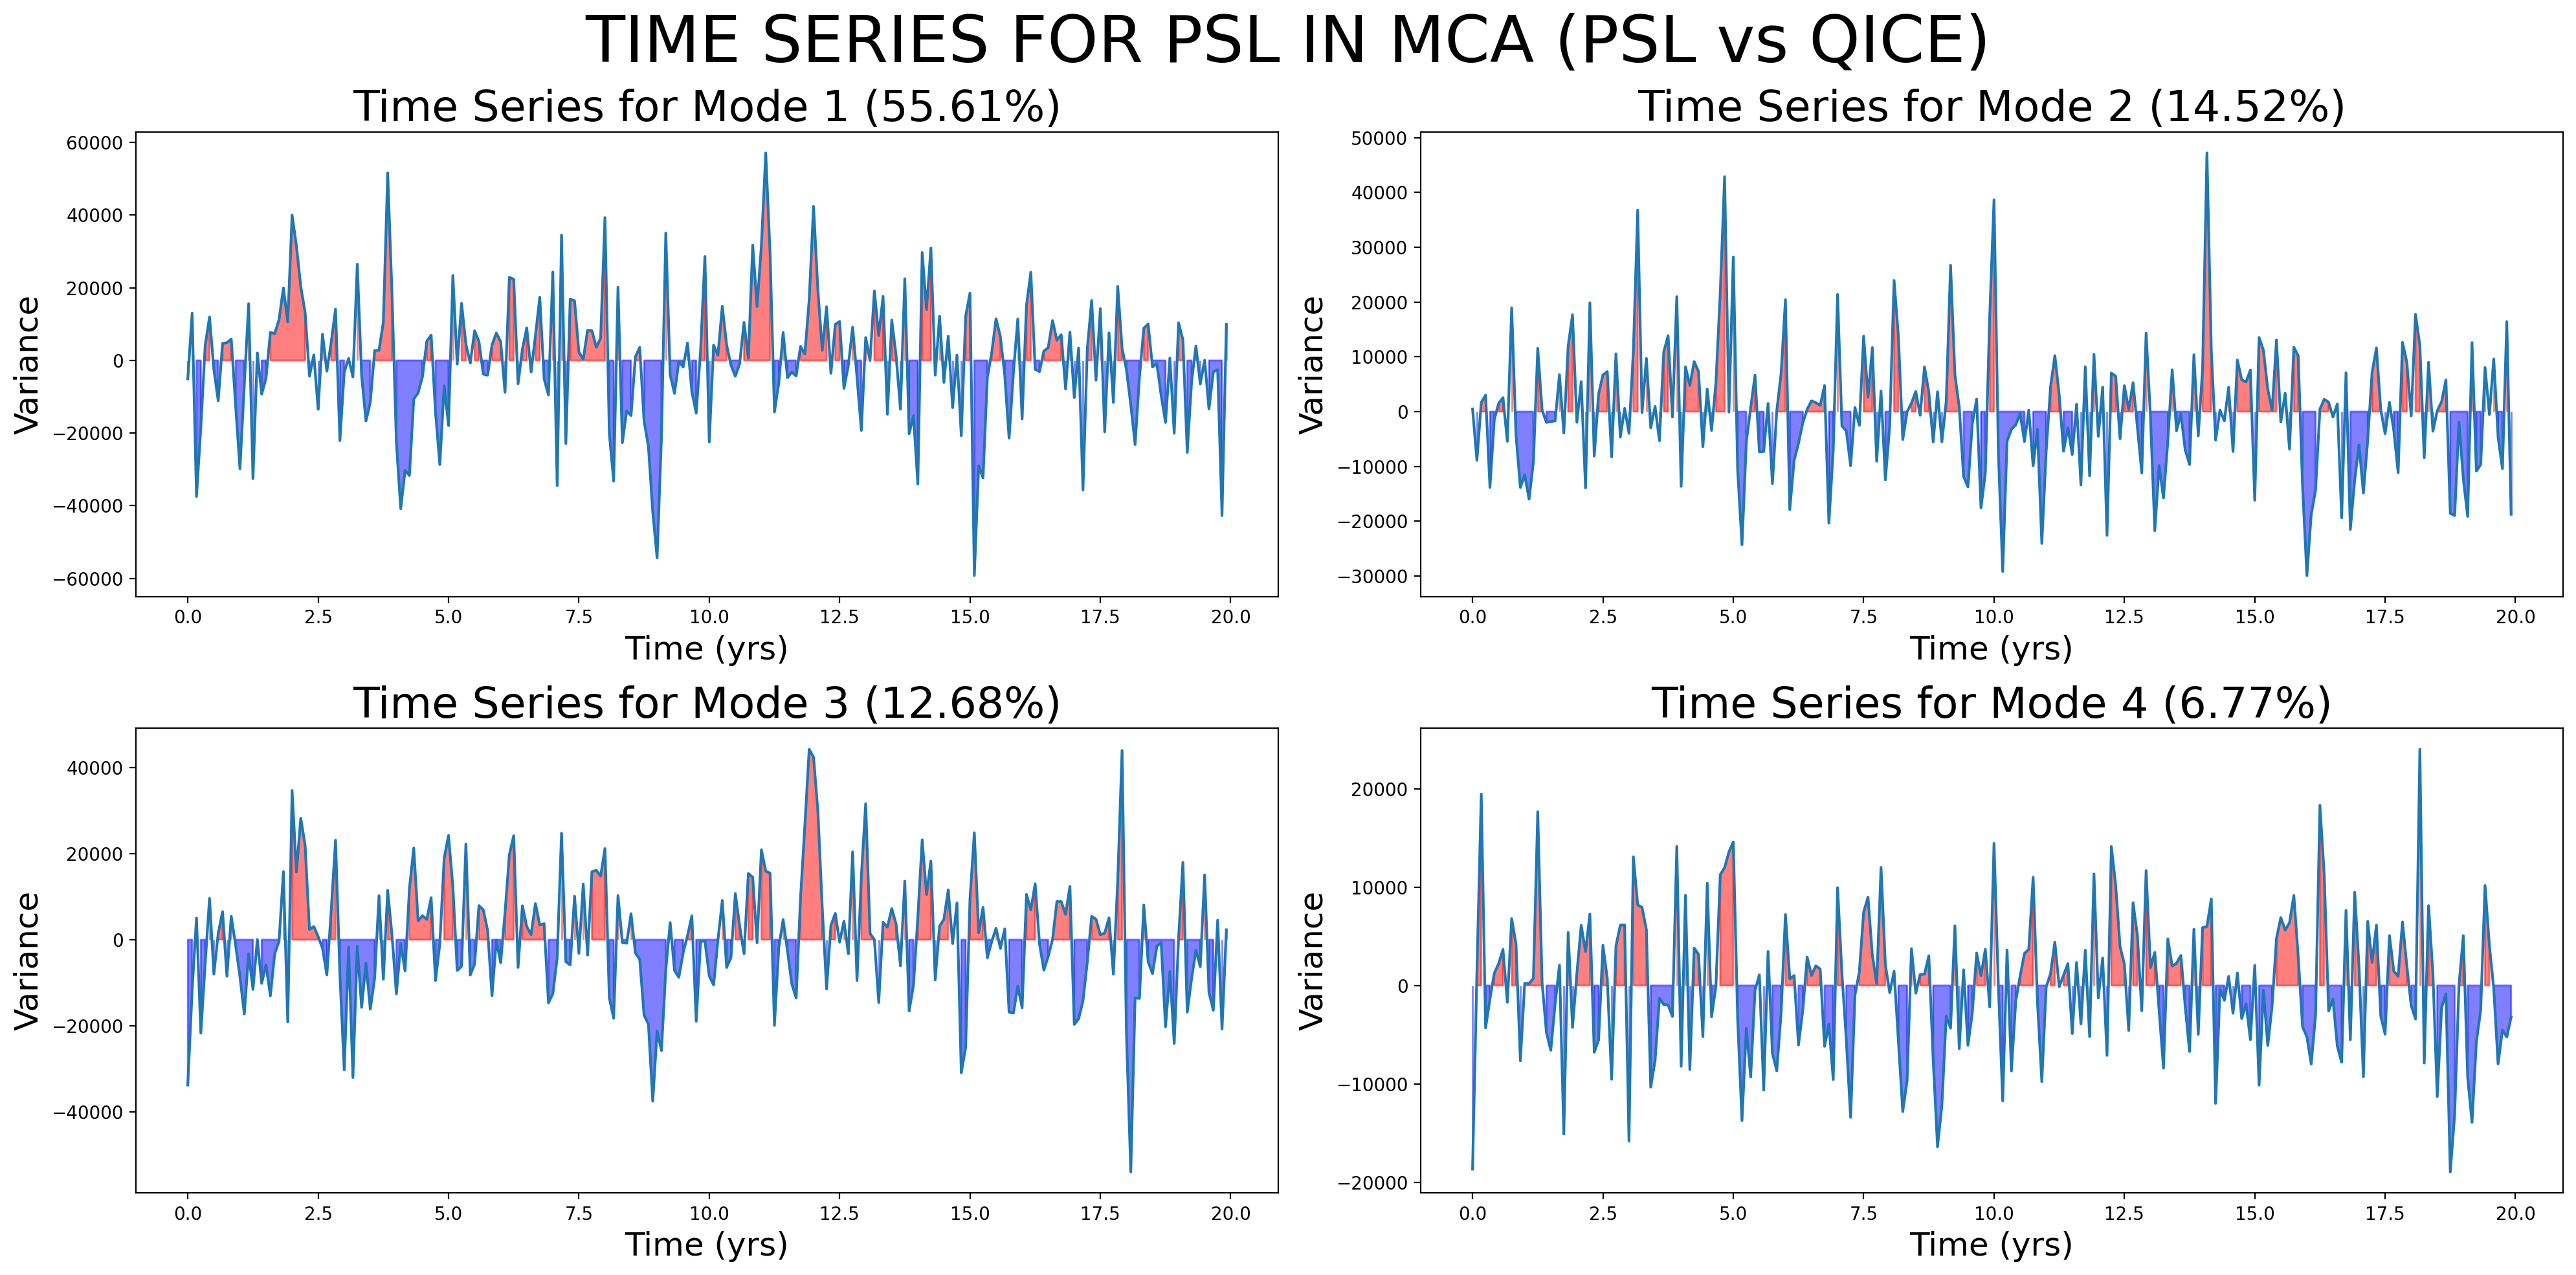

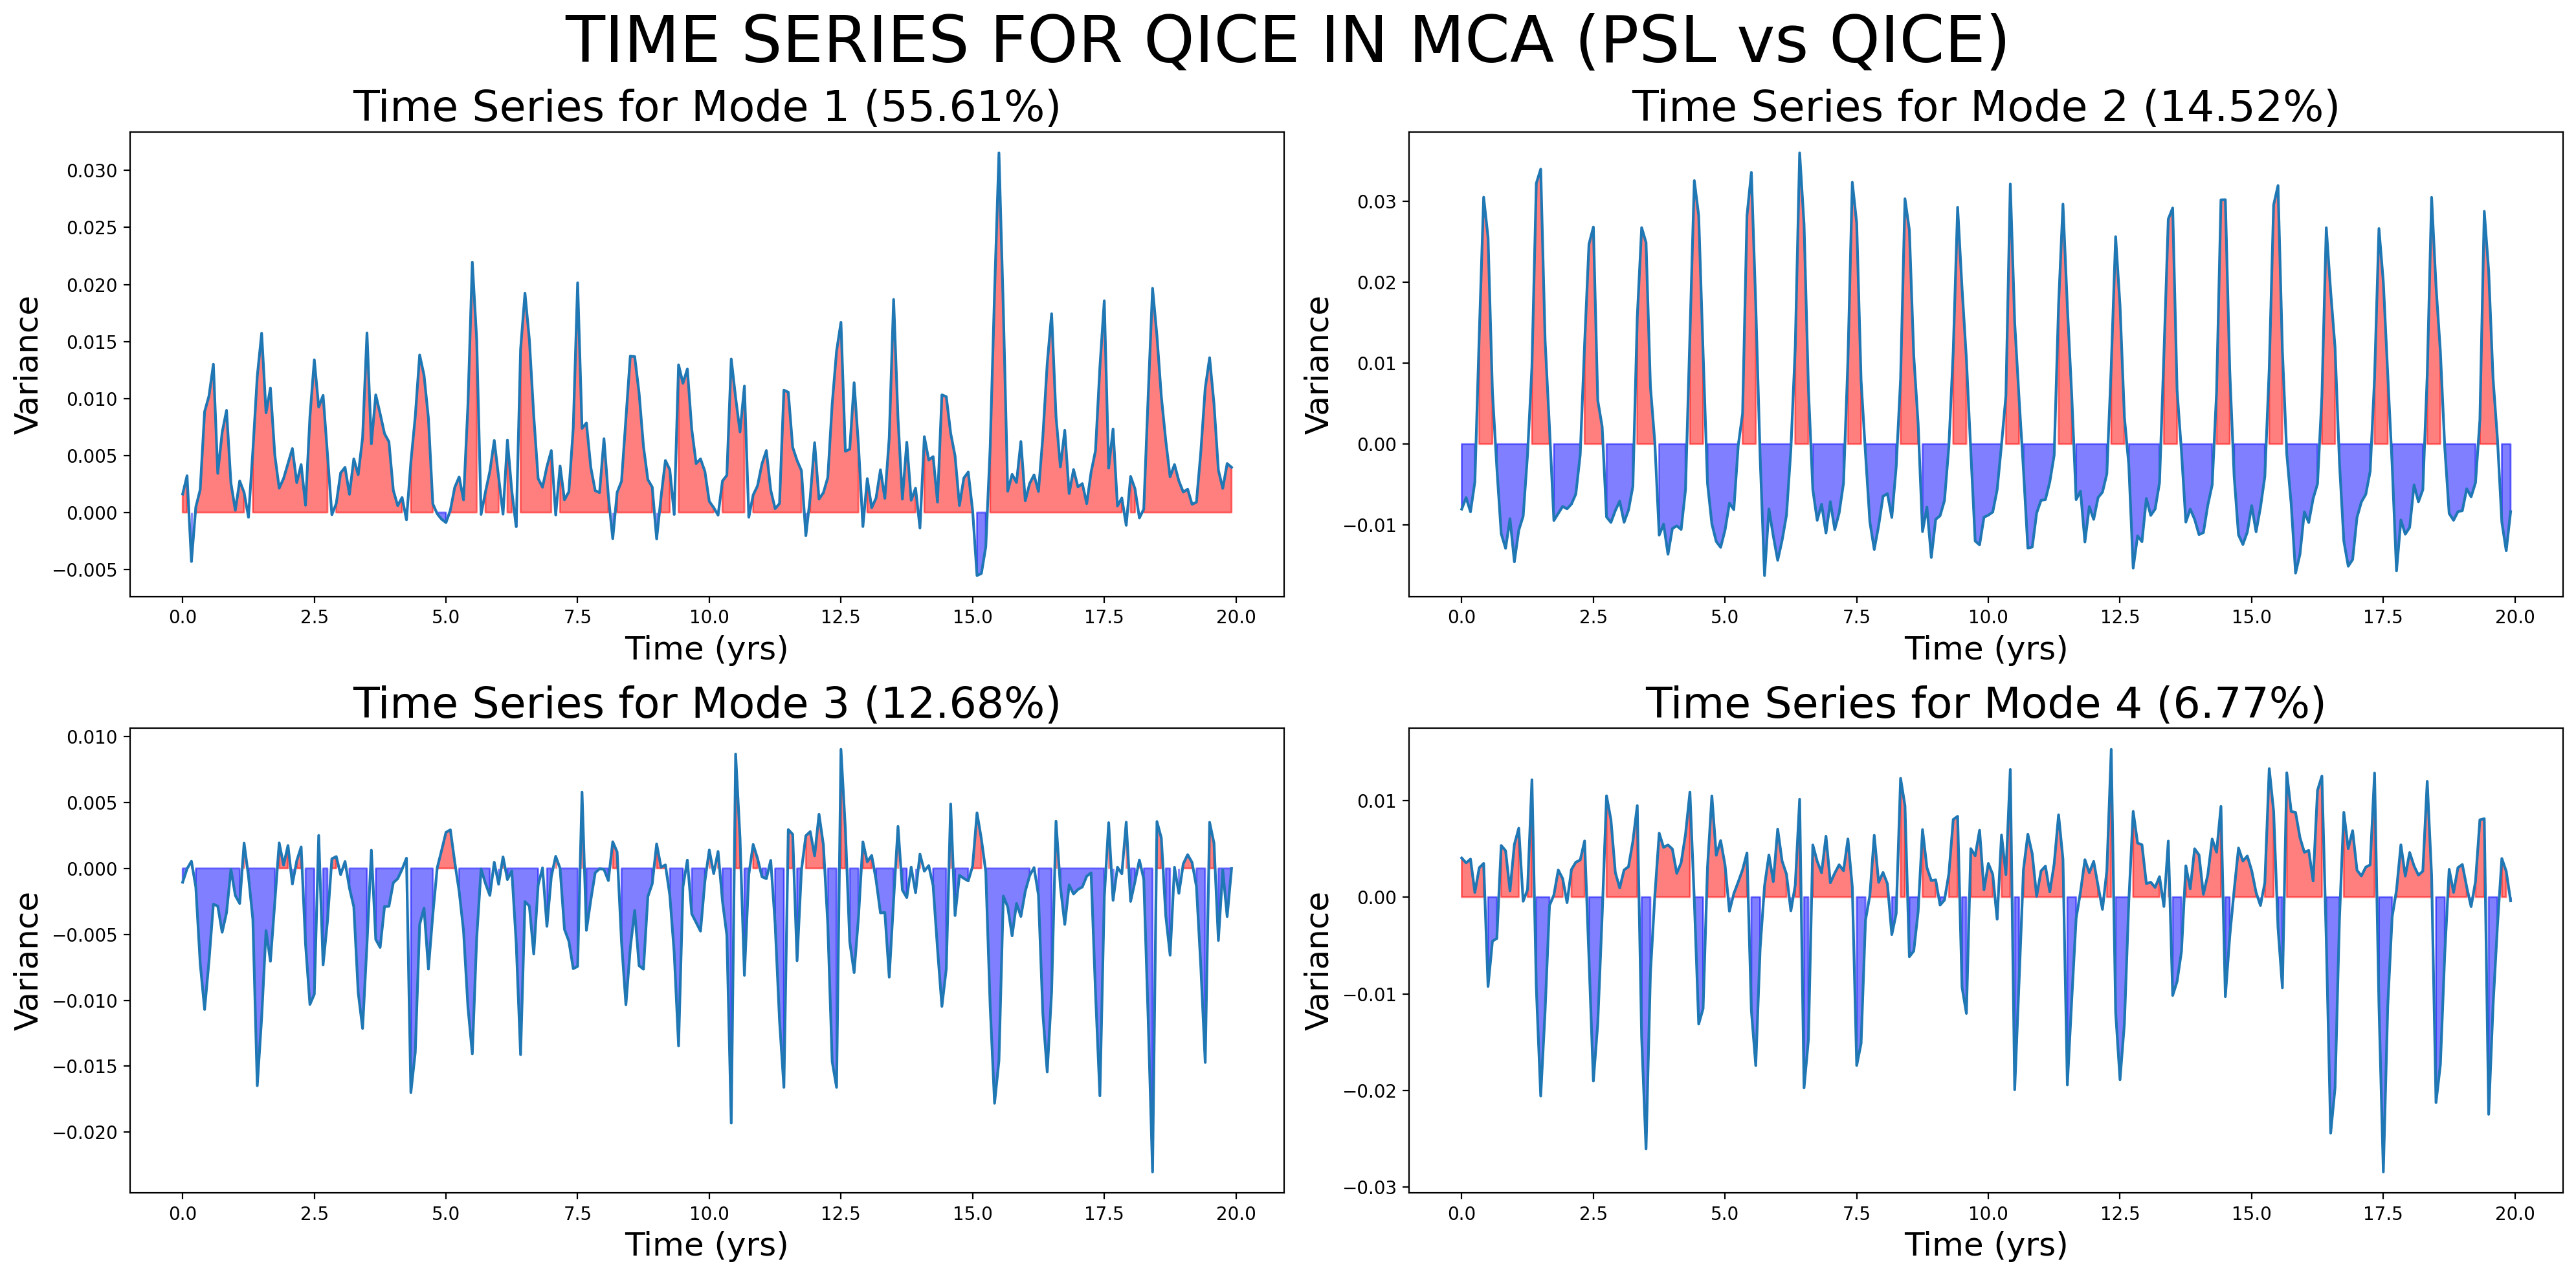

______________
reshaping to 3d
______________
graphing
understood data
made plots
plotting 0
plotting 1
plotting 2
plotting 3
accessorizing


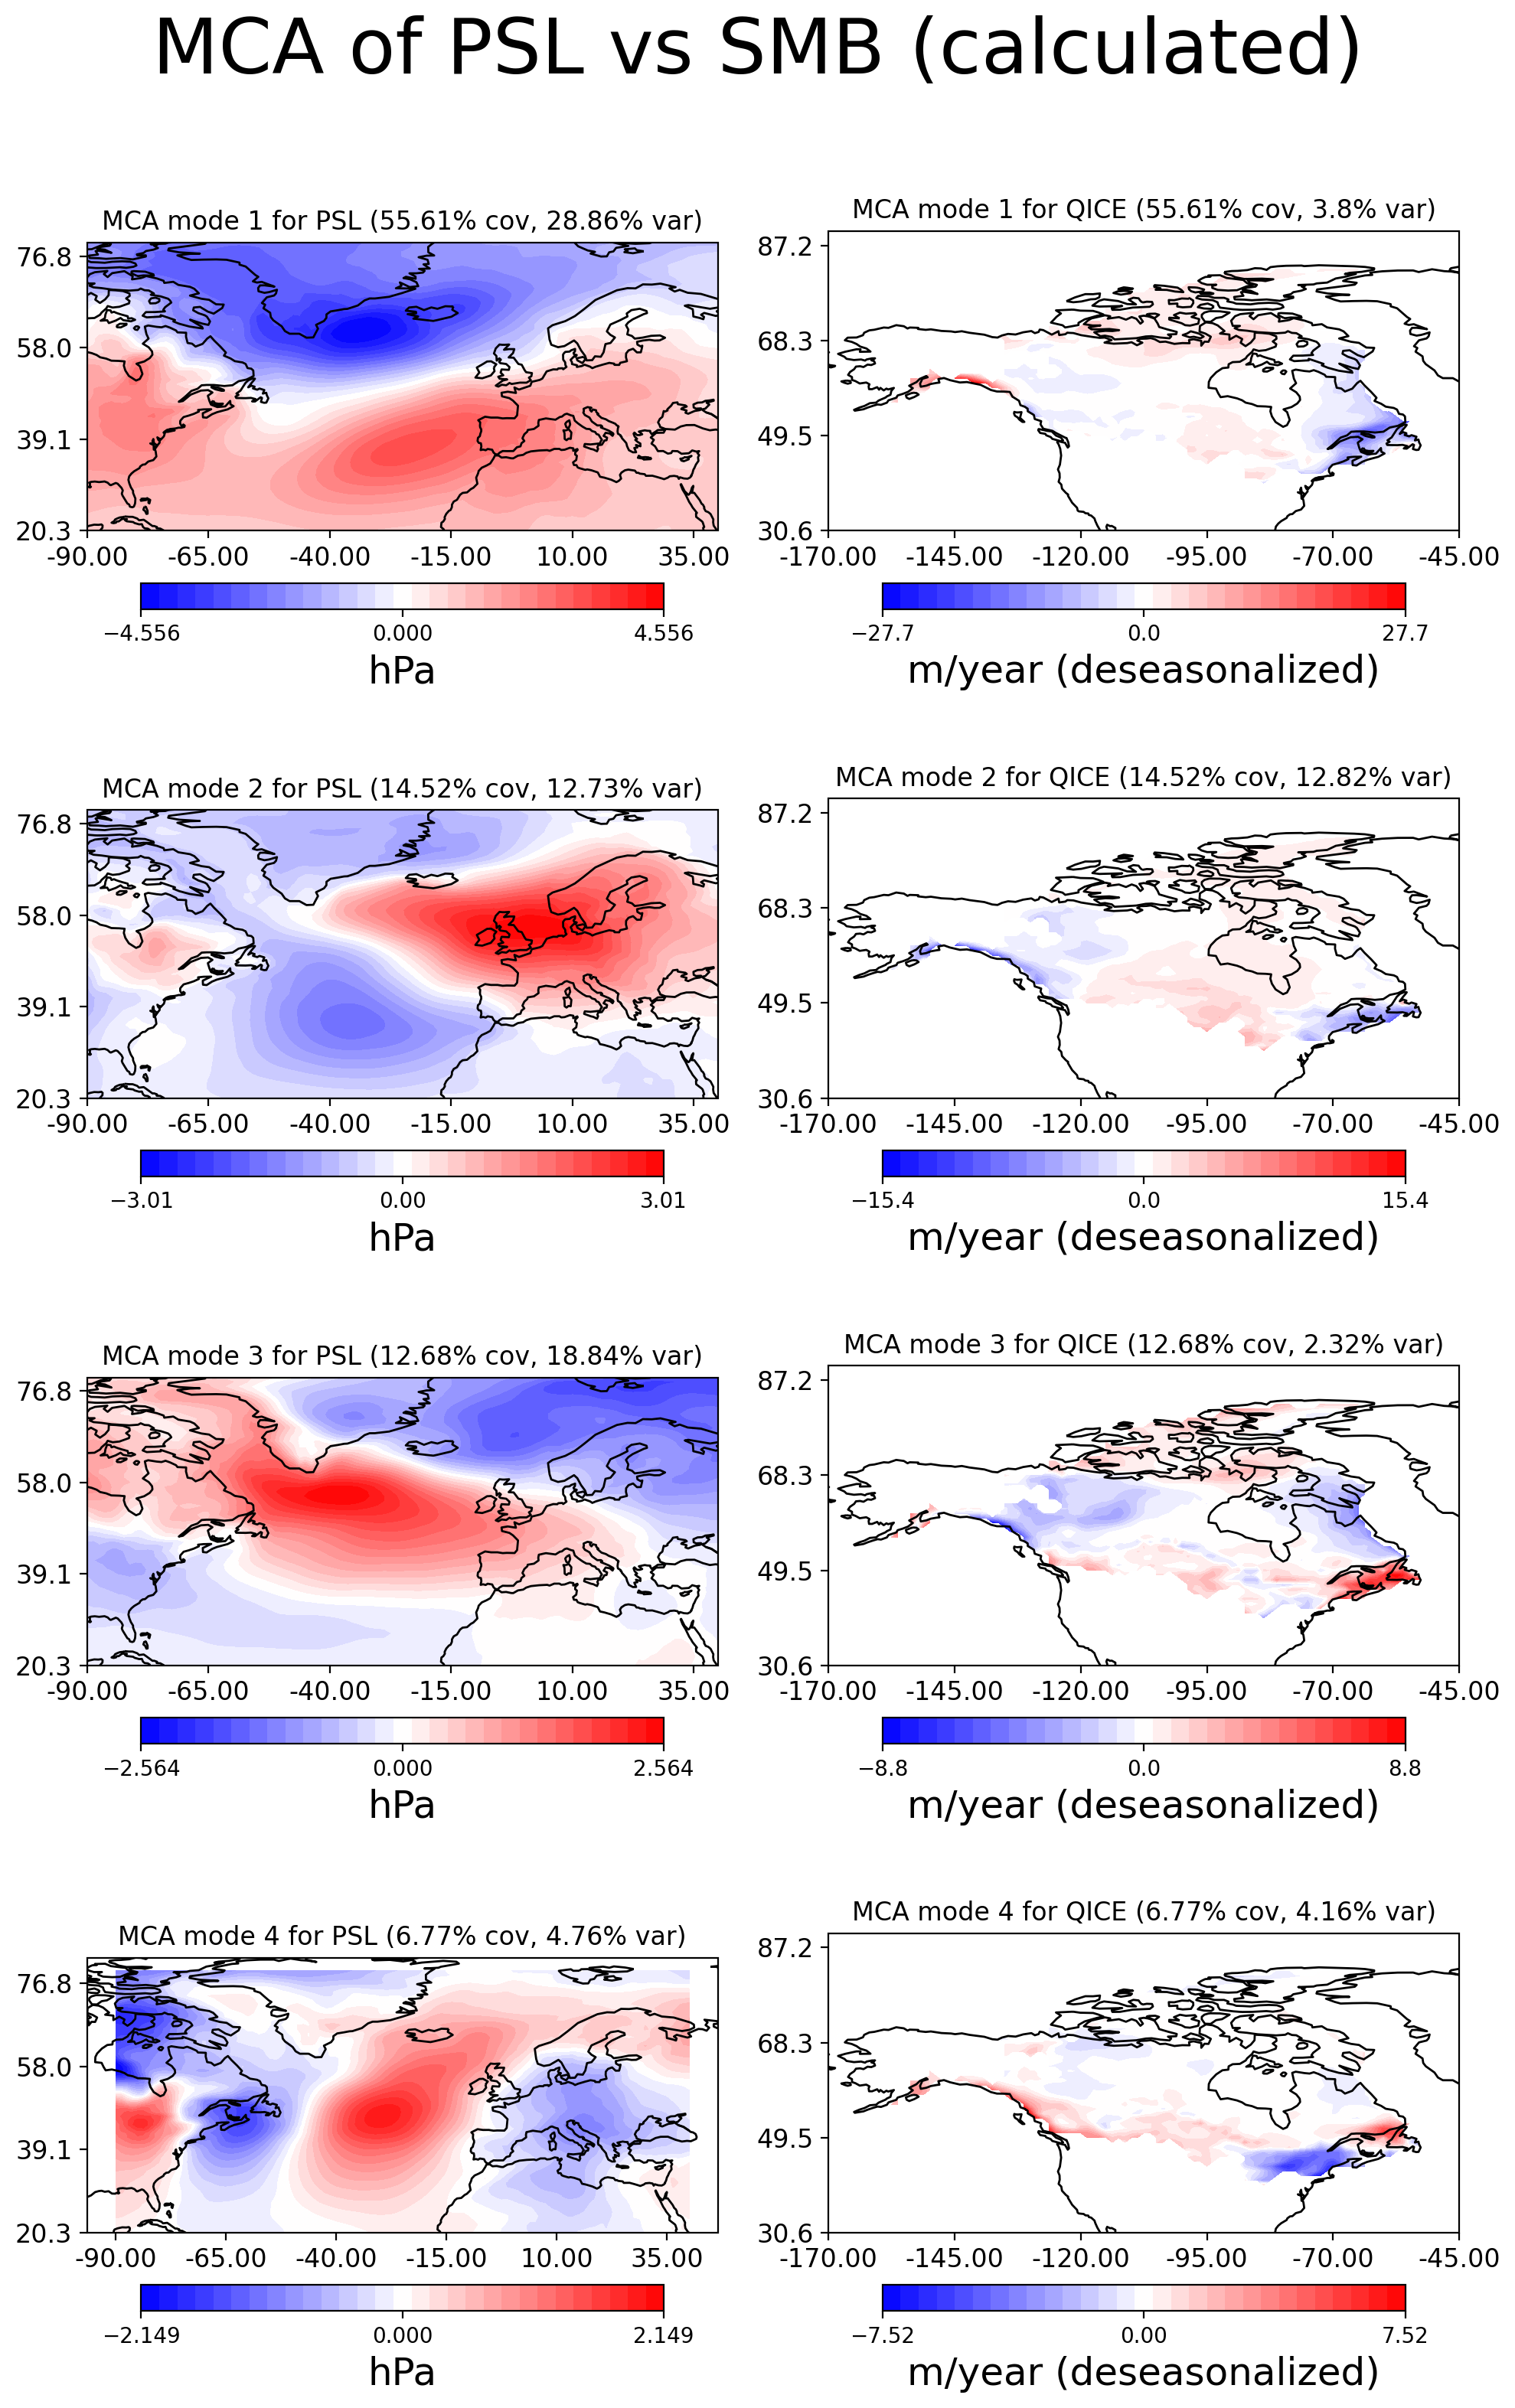

In [27]:
print("______________")
print("performing SVD")
psl_qice_U, psl_qice_S, psl_qice_V_T = svd(psl_X_dimensional, smb_X_dimensional, 10)

print("______________")
print("displaying covariance percentage")
cov_1 = plot_cov(psl_qice_S, "PSL VS QICE")
x_var, y_var = mca_variance_explained(psl_X_dimensional, smb_X_dimensional, psl_qice_U, psl_qice_V_T, 4)

print("______________")
print("graphing time series")
plot_time_series(psl_qice_U, psl_X_dimensional, 4, "TIME SERIES FOR PSL IN MCA (PSL vs QICE)", cov_1)
plot_time_series(psl_qice_V_T.T, smb_X_dimensional, 4, "TIME SERIES FOR QICE IN MCA (PSL vs QICE)", cov_1)

print("______________")
print("reshaping to 3d")
psl_U_reshaped = psl_qice_U.reshape(lat_length,long_length, 10)
smb_V_reshaped = nans_2d_to_3d(psl_qice_V_T.T, smb_long_length, smb_lat_length, smb_longs, smb_lats)

print("______________")
print("graphing")

data_mca1_1 ={
    'reshaped_mca': psl_U_reshaped,
    'original': north_atlantic_ocean_psl,
    'label': "hPa",
    'subtitle': "PSL",
    'shift': 0,
    'sigma':  psl_qice_S,
    'l_override': {}
}

data_mca1_2 ={
    'reshaped_mca': smb_V_reshaped,
    'original': smb_processed,
    'label': "m/year (deseasonalized)",
    'subtitle': "QICE",
    'shift': 360,
    'sigma': psl_qice_S,
    'l_override': {}

}

plot_mca(data_mca1_1, data_mca1_2, 4, "MCA of PSL vs SMB (calculated)", cov_1, x_var, y_var)

In [ ]:
psl_X_dimensional.shape, smb_X_dimensional.shape